<a href="https://colab.research.google.com/github/Joaovtmendes/data-modeling/blob/main/dataset_para_modelagem_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [ ]:
import numpy as np
import pandas as pd
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
df = pd.read_excel("/content/Data.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,CustomerID
count,541909.000000,406829.000000
mean,9.552250,15287.690570
std,218.081158,1713.600303
min,-80995.000000,12346.000000
25%,1.000000,13953.000000
50%,3.000000,15152.000000
75%,10.000000,16791.000000
max,80995.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


##Limpeza dos dados

In [ ]:
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  object 
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [ ]:
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")
df["UnitPrice"] = df["UnitPrice"].astype(float)

<ipython-input-73-626bb990bbd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")
<ipython-input-73-626bb990bbd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UnitPrice"] = df["UnitPrice"].astype(float)


##Filtro >0

In [ ]:

df_filtrado = df[(df["UnitPrice"] > 0) & (df["Quantity"] > 0)]

In [ ]:
df_filtrado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-09-12 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France


##Duplicados

In [ ]:
df_filtrado.duplicated().sum()

4621

In [ ]:
df_filtrado = df_filtrado.drop_duplicates()

##Tipos de dados da coluna

In [ ]:
df_filtrado["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df_filtrado["CustomerID"] = df_filtrado["CustomerID"].astype(int)

<ipython-input-106-5aea26127493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
<ipython-input-106-5aea26127493>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["CustomerID"] = df_filtrado["CustomerID"].astype(int)


In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350562 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    350562 non-null  object        
 1   StockCode    350562 non-null  object        
 2   Description  350562 non-null  object        
 3   Quantity     350562 non-null  int64         
 4   InvoiceDate  350562 non-null  datetime64[ns]
 5   UnitPrice    350562 non-null  float64       
 6   CustomerID   350562 non-null  int64         
 7   Country      350562 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.1+ MB


##Outliers

<Figure size 1000x600 with 0 Axes>

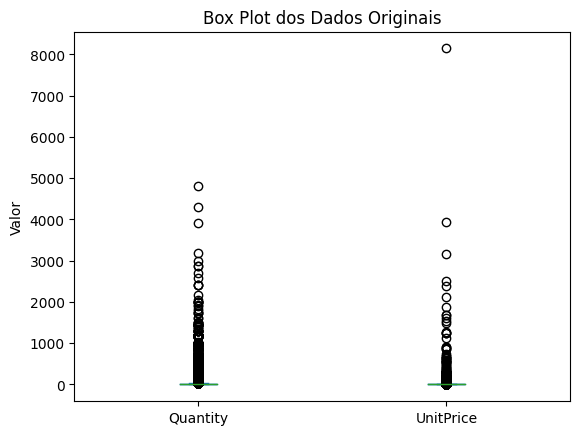

In [ ]:
numerical_cols = ["Quantity", "UnitPrice"]
df_numeric = df_filtrado[numerical_cols]

plt.figure(figsize=(10, 6))
df_numeric.plot.box()
plt.title("Box Plot dos Dados Originais")
plt.ylabel("Valor")
plt.grid(False)
plt.show()

<Figure size 1000x600 with 0 Axes>

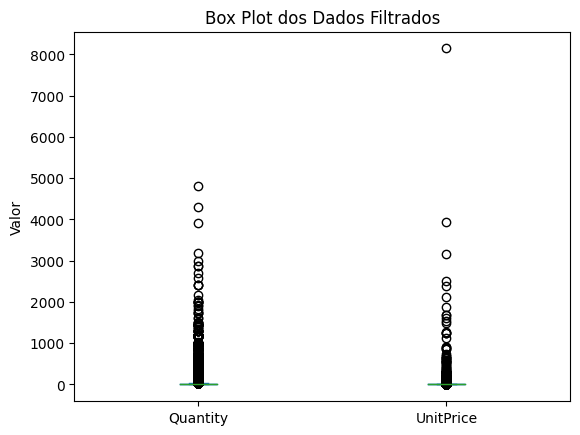

In [ ]:
df_filtrado = df_filtrado[~((df_filtrado["Quantity"] > 10000) & (df_filtrado["UnitPrice"] > 5000))]

df_numeric_filtered = df_filtrado[numerical_cols]

plt.figure(figsize=(10, 6))
df_numeric_filtered.plot.box()
plt.title("Box Plot dos Dados Filtrados")
plt.ylabel("Valor")
plt.grid(False)
plt.show()


##Coluna TotalPrice

In [ ]:
df_filtrado["TotalPrice"] = df_filtrado["Quantity"] * df_filtrado["UnitPrice"]

df_filtrado.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


##Ultima compra

In [ ]:
ultima_compra = df_filtrado["InvoiceDate"].max()

print(f"A data da última compra é: {ultima_compra}")

A data da última compra é: 2011-12-10 17:19:00


##Top 10 países com maior valor em vendas

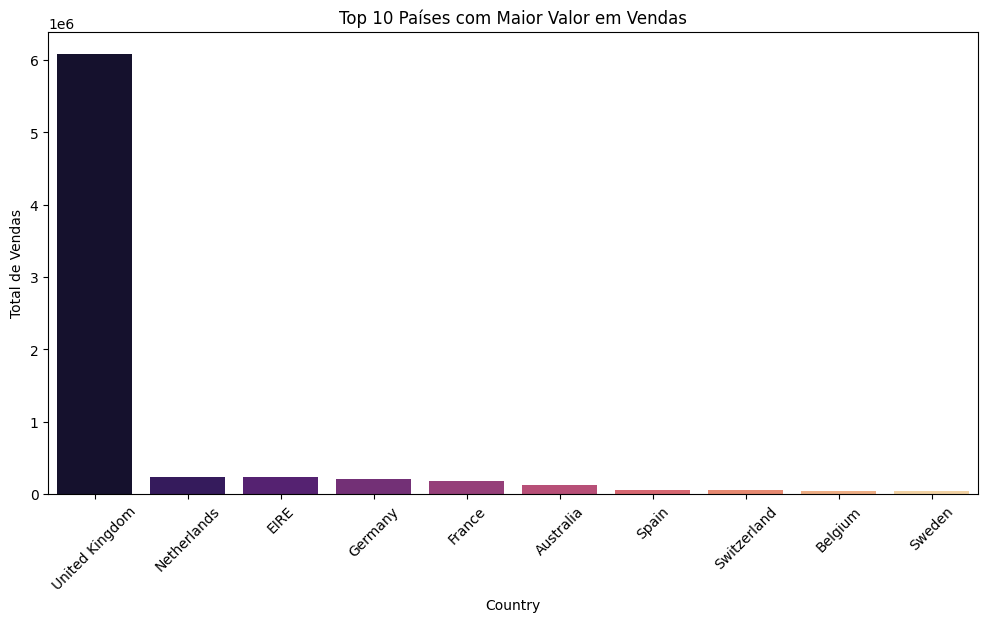

In [ ]:
vendas_por_pais = df_filtrado.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', data=vendas_por_pais, palette='magma')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

##Top 10 produtos mais vendidos

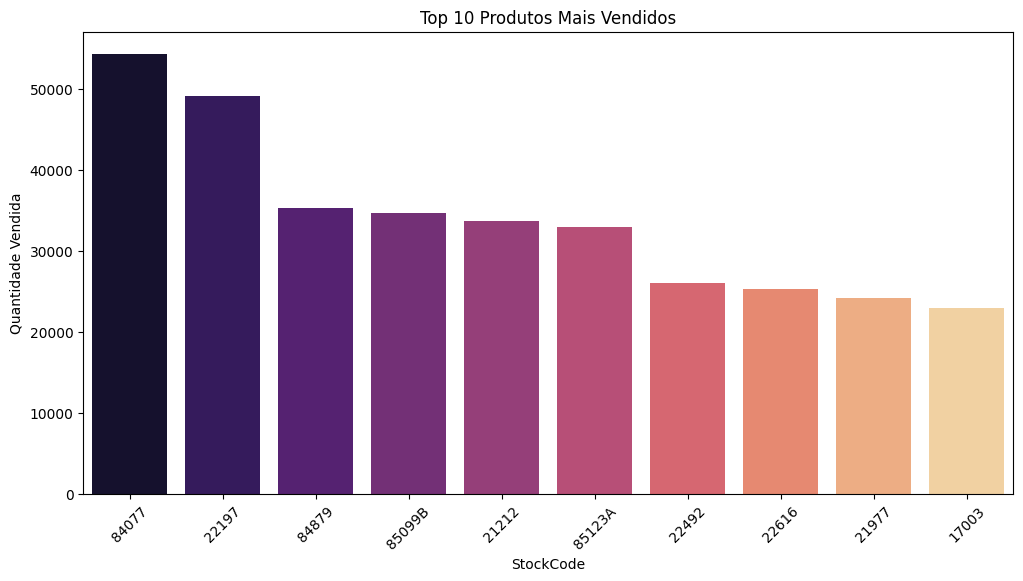

In [ ]:
produtos_mais_vendidos = df_filtrado.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='StockCode', y='Quantity', data=produtos_mais_vendidos, palette='magma')
plt.title('Top 10 Produtos Mais Vendidos')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

##Valor de venda total por mês

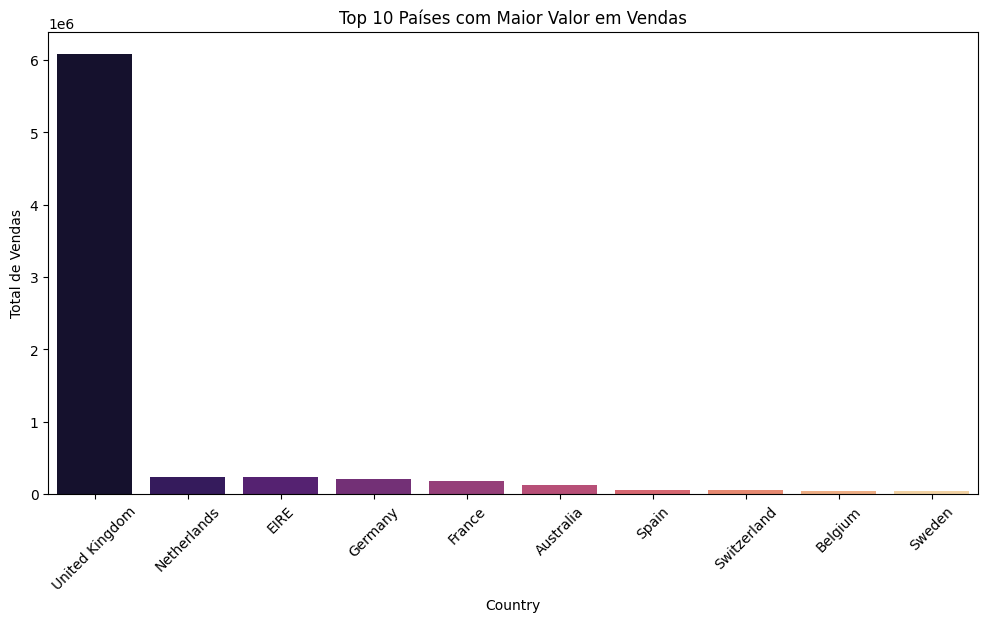

In [ ]:
df_filtrado['Country'] = df_filtrado['Country'].astype(str)

df_filtrado['TotalPrice'] = pd.to_numeric(df_filtrado['TotalPrice'], errors='coerce')

df_filtrado = df_filtrado.dropna(subset=['TotalPrice'])

vendas_por_pais = df_filtrado.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', data=vendas_por_pais, palette='magma')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)

plt.show()

##Valor de venda total por mês e por país (top 10 países)

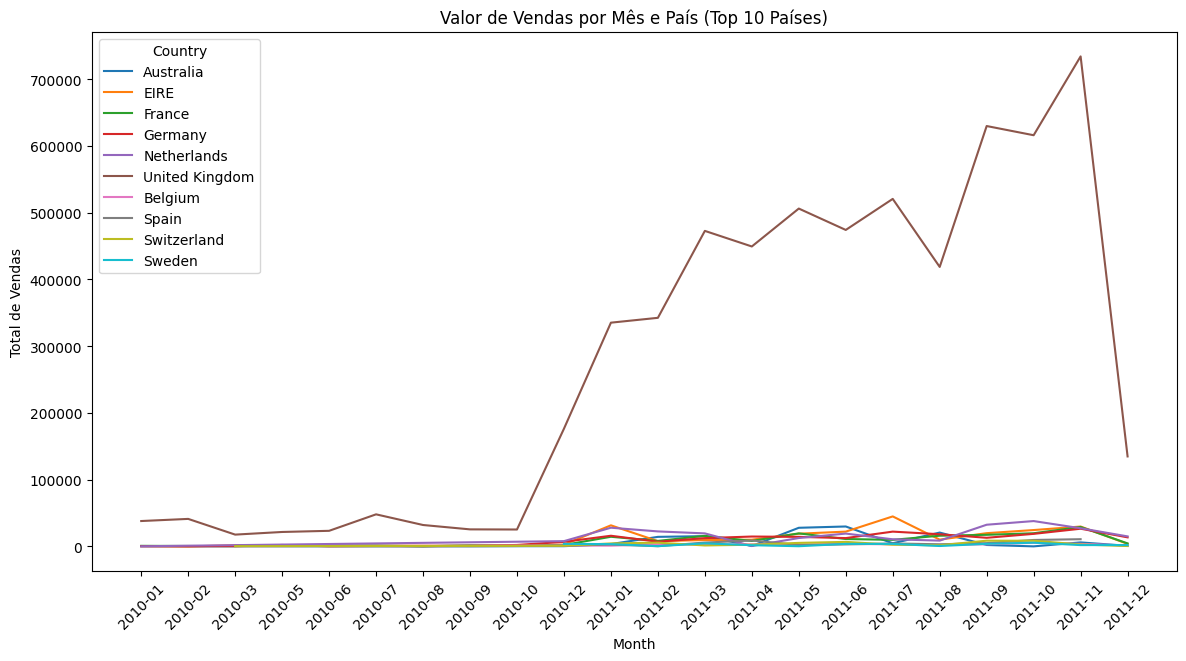

In [ ]:
top_10_paises = vendas_por_pais['Country'].tolist()

df_top_10_paises = df_filtrado[df_filtrado['Country'].isin(top_10_paises)]

vendas_mes_pais = df_top_10_paises.groupby(['Month', 'Country'])['TotalPrice'].sum().reset_index()

vendas_mes_pais['Month'] = vendas_mes_pais['Month'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='TotalPrice', hue='Country', data=vendas_mes_pais, palette='tab10')
plt.title('Valor de Vendas por Mês e País (Top 10 Países)')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

##Calculo do RFM

In [ ]:
ultima_compra = df_filtrado.groupby('CustomerID')['InvoiceDate'].max().reset_index()
ultima_compra.columns = ['CustomerID', 'UltimaCompra']

frequencia = df_filtrado.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequencia.columns = ['CustomerID', 'Frequencia']

total_gasto = df_filtrado.groupby('CustomerID')['TotalPrice'].sum().reset_index()
total_gasto.columns = ['CustomerID', 'TotalGasto']

ticket_medio = total_gasto.copy()
ticket_medio['TicketMedio'] = ticket_medio['TotalGasto'] / frequencia['Frequencia']
ticket_medio = ticket_medio[['CustomerID', 'TicketMedio']]

data_ultima_compra = df_filtrado['InvoiceDate'].max()
ultima_compra['Recencia'] = (data_ultima_compra - ultima_compra['UltimaCompra']).dt.days

rfm = ultima_compra[['CustomerID', 'Recencia']].merge(frequencia, on='CustomerID').merge(ticket_medio, on='CustomerID')

print(rfm.head())

   CustomerID  Recencia  Frequencia  TicketMedio
0       12347        40           7   556.811429
1       12348        76           4   449.310000
2       12349        19           1  1662.970000
3       12350       311           1   233.600000
4       12352        73           8   298.970000
